# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

In [1]:
import re
import nltk
import numpy as np
from string import punctuation
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/TL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/TL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/TL/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### 1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

In [3]:
def generate_matrix(n, a, b):
    return np.random.randint(low=a, high=b+1, size=(n, n))

In [4]:
generate_matrix(5, 1, 10)

array([[ 8, 10,  4,  2,  9],
       [ 7,  3,  3,  8,  2],
       [ 1,  9,  8,  7,  3],
       [ 7,  9,  2,  8,  1],
       [ 4,  9,  9,  3,  2]])

#### 2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

#### Load the files:

In [5]:
with open("data/networks.txt") as f:
    [corpus] = f.readlines()

with open("data/stop.txt") as f:
    stop = set(line.strip(punctuation + ",\n") for line in f)

##### Tokenize, then remove stopwords and punctuation:

In [6]:
tokens = nltk.word_tokenize(corpus.lower())
tokens = [token for token in tokens if (token not in stop and token not in punctuation)]

In [7]:
len(tokens)

641

In [8]:
len(stop)

179

In [16]:
import pandas as pd
pd.DataFrame(test).duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178     True
179    False
Length: 180, dtype: bool

In [10]:
test = ['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'too',
 'under',
 'until',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'networks',
 'users',
 'security',
 'networks',
 'due']

##### Get top 20 words in ascending order:

In [7]:
word_freq = {}
for word in tokens:
    word_freq[word] = word_freq.get(word, 0) + 1
top_20_asc = sorted(word_freq.items(), key=lambda x: x[1])[-20:]

##### Create the bar plot:

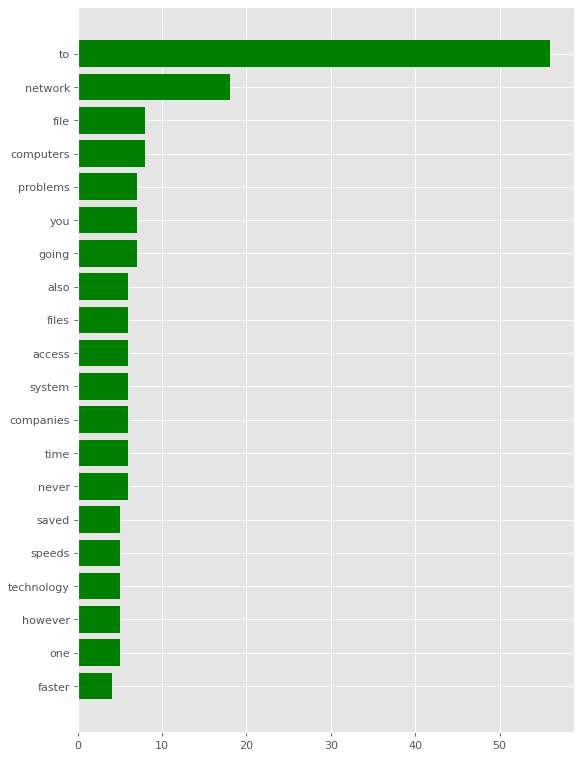

In [8]:
keys, values = zip(*top_20_asc)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 12), dpi=80)
ax.barh(keys, values, color='g')
plt.show()

#### 3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

##### Load the files:

In [17]:
with open("data/ateneo.txt") as f:
    ateneo_text = f.readlines()

with open("data/tl-en.txt") as f:
    fil_to_eng = {}
    for line in f:
        fil, eng = line.strip().split()
        fil_to_eng[fil] = eng

##### Define a function for translating words:

In [28]:
re.search(r"([^a-zA-Z0-9]*)([\w'\-]*)([^a-zA-Z0-9]*)", "grabe..").groups()

('', 'grabe', '..')

In [29]:
def translate(string, dictionary):
    """Translate a string with the given dictionary.
    Steps:
    1. Group each space-separated substring into 3 parts:
        - Left punctuation
        - Word
        - Right punctuation
    2. "Un-capitalize" each word and translate with dictionary.
    3. Convert back to original capitalization and put back punctuations.
    """
    
    translated_text = []
    for substr in string.split():
        mo = re.search(r"([^a-zA-Z0-9]*)([\w'.\-]*)([^a-zA-Z0-9]*)", substr)
        left_punc, word, right_punc = mo.groups()
        word_is_capitalized = word[0].isupper()
        word = word.lower()
        
        translated_word = dictionary.get(word, word)

        if word_is_capitalized:
            translated_word = translated_word.capitalize()
        translated_text.append(left_punc + translated_word + right_punc)
    return ' '.join(translated_text)

##### Translate:

In [33]:
translated_text = [translate(s, fil_to_eng) for s in ateneo_text]
for original, translated in zip(ateneo_text, translated_text):
    print(f"original:   {original.rstrip()}\ntranslated: {translated}\n" + '-'*12)

original:   "Manong, para lang d'yan sa may side."
translated: "Manong, to only d'yan sa have side."
------------
original:   "Mej hassle naman this rain."
translated: "Mej hassle naman this rain."
------------
original:   "Ano, bro? Katip later? G?"
translated: "What, bro? Katip later? G?"
------------
original:   "Wait, I'm like gonna dinner lang with the fambam."
translated: "Wait, I'm like gonna dinner only with the fambam."
------------
original:   "Which car am I gonna take today kaya?"
translated: "Which car am I gonna take today so?"
------------
original:   "Don't make tusok sa fishball muna, it's not lutong yet."
translated: "Don't make stitch sa fishball first, it's not cuisine yet."
------------
original:   "Kuya magkano po yung neon balls?"
translated: "Brother much po yung neon balls?"
------------
original:   "Pweds ka ba later?"
translated: "Pweds ka ba later?"
------------
original:   "Ugh, there's no parking space pa. Eh, I'm late na nga."
translated: "Ugh, there's no

#### 4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**

##### Load the dictionary:
Keys = words<br>
values = list of possible translations

By default, we always pick the first entry in the list for the translation.

In [12]:
eng_to_fil = {}

with open("data/tl-en.txt") as f:
    for line in f:
        fil, eng = line.strip().split()
        eng_to_fil[eng] = eng_to_fil.get(eng, []) + [fil]
        
list(eng_to_fil.items())[:10]

[('the', ['ang', 'mga', 'yung']),
 ('this', ['ito', 'nito']),
 ('on', ['noong']),
 ('there', ['may']),
 ('have', ['may']),
 ('as', ['bilang', 'gaya']),
 ('number', ['bilang']),
 ('not', ['hindi', 'hinde']),
 ('from', ['mula']),
 ('to', ['para', 'kay'])]

##### To handle plural forms:
1. Lemmatize first before translation.
2. Convert to Filipino plural form.

In [13]:
def translate(string, dictionary):
    """Translate a string with the given dictionary.
    Steps:
    1. Split the string into a list of space-separated words and newlines
    2. Group each space-separated substring into 3 parts:
       - left_punctuation, word, right_punctutation
    3. Lemmatize & Un-capitalize each word
    4. Translate with dictionary.
    5. Revert to original capitalization/plurality
    6. Put back punctuation marks
    7. Join everything together
    """
    
    translated_text = []

    # Split the string
    lines = re.split("(\n+)", string)
    lines = [[w for w in line.split(" ")] for line in lines]
    substrings = [s for line in lines for s in line]

    for substr in substrings:
        # Group into 3
        mo = re.search(r"([^a-zA-Z0-9]*)([\w'\-]*)([^a-zA-Z0-9]*)", substr)
        left_punc, word, right_punc = mo.groups()
        
        # If substring is empty or purely special characters
        if word == "":
            translated_text.append(left_punc + right_punc)
            continue
        
        word, pos = nltk.pos_tag([word])[0]
            
        # Flags
        word_is_acronym = all([c.isupper() for c in word]) and len(word) > 1
        word_is_proper_noun = pos in ("NNP", "NNPS")
        word_is_plural = pos in ("NNS", "NNPS")
        word_is_capitalized = word[0].isupper()

        if not word_is_acronym and not word_is_proper_noun:            
            word = word.lower()

        # Check dictionary:
        # Try word, then lemmatized word
        # But prioritize original word
        word_trans = dictionary.get(word)
        lemmatizer = WordNetLemmatizer()
        lemmatized_trans = dictionary.get(lemmatizer.lemmatize(word))
        
        if word_trans:
            possible_translations = word_trans
        elif lemmatized_trans:
            possible_translations = lemmatized_trans
        else:
            possible_translations = [word]
        
        # Translate: always choose the first entry
        translated_word = possible_translations[0]            
            
        # Revert to original capitalization
        if word_is_capitalized and not (word_is_plural or word_is_acronym or word_is_proper_noun):
            translated_word = translated_word.capitalize()

        # If word was a plural noun, convert to plural form
        # Note: Capitalization is not consistent for proper nouns.
        if word_is_plural:
            translated_word = f"{'M' if word_is_capitalized else 'm'}ga {translated_word}"

        translated_text.append(left_punc + translated_word + right_punc)

    # Separate with space, except after newlines
    translated_text = [s+' ' if not re.search("(^\n+$)", s) else s for s in translated_text]
    return ''.join(translated_text)

##### Retrieve song:

In [14]:
import lyricsgenius as lg

In [15]:
genius = lg.Genius()
song = genius.search_song("Angel of the Morning")

Searching for "Angel of the Morning"...
Done.


In [16]:
# Get rid of unicode characters
song.lyrics = re.sub(r'[^\x00-\xFF]',' ', song.lyrics)
print(song.lyrics)

[Intro]

[Verse 1]
There'll be no strings to bind your hands
Not if my love can't bind your heart
There's no need to take a stand
For it was I who chose to start

[Pre-Chorus 1]
I see no need to take me home
I'm old enough to face the dawn

[Chorus]
Just call me angel of the morning, angel
Just touch my cheek before you leave me, baby
Just call me angel of the morning, angel
Then slowly turn away from me

[Verse 2]
Maybe the sun's light will be dim
And it won't matter anyhow
If morning's echoes say we've sinned
Well, it was what I wanted now

[Pre-Chorus 2]
And if we're victims of the night
I won't be blinded by the light
[Chorus]
Just call me angel of the morning, angel
Just touch my cheek before you leave me, baby
Just call me angel of the morning angel
Then slowly turn away, I won't beg you to stay with me

[Bridge]
Through the tears
Of the day
Of the years
Baby!

[Chorus]
Just call me angel of the morning, angel
Just touch my cheek before you leave me, baby
Just call me angel of th

##### Translate the song:

In [17]:
translated_lyrics = translate(song.lyrics, eng_to_fil)
print(translated_lyrics)

[Intro] 

[Tula 1] 
There'll maging walang mga string para bind iyong mga kamay 
Hindi kung my love can't bind iyong puso 
There's walang kailangan para kumuha a stand 
For it was I sino chose para simula 

[Pre-chorus 1] 
I tingnan walang kailangan para kumuha me bahay 
I'm matanda sapat para mukha ang liwayway 

[Chorus] 
Basta tawag me anghel of ang umaga, anghel 
Basta touch my pisngi bago ikaw umalis me, sanggol 
Basta tawag me anghel of ang umaga, anghel 
Pagkatapos slowly turn away mula me 

[Tula 2] 
Baka ang sun's liwanag will maging madilim 
And it won't matter anyhow 
Kung morning's mga echo say we've sinned 
Well, it was ano I wanted ngayon 

[Pre-chorus 2] 
And kung we're mga biktima of ang gabi 
I won't maging blinded by ang liwanag 
[Chorus] 
Basta tawag me anghel of ang umaga, anghel 
Basta touch my pisngi bago ikaw umalis me, sanggol 
Basta tawag me anghel of ang umaga anghel 
Pagkatapos slowly turn away, I won't beg ikaw para manatili kay me 

[Tulay] 
Through ang mga

### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**